In [1254]:
# Step 1: Loading the Real Estate Pricing Dataset
# Load the dataset into a Pandas DataFrame to begin your exploratory data analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('housing_data.csv')
print(df)







      Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg       

In [1255]:
# Step 2: Cleaning the Housing Dataset
# Count missing values in each column
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

# Display columns with missing data
print(missing_counts[missing_counts > 0])
print(missing_percent[missing_percent > 0])
                                                                           

Alley          1369
MasVnrType      872
Electrical        1
GarageYrBlt      81
dtype: int64
Alley          93.767123
MasVnrType     59.726027
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64


### Drop columns with more than 50% missing values


### Fill 5–10% missing with mean

### Fill ~30% missing with median




In [1256]:
# 2. Handle Missing Values Based on Threshold
### Drop columns with more than 50% missing values
df[col] = df[col].fillna(df[col].mean())
df[col] = df[col].fillna(df[col].mean())


# # # Fill 5–10% missing with mean
for col in missing_percent[(missing_percent > 5) & (missing_percent <= 10)].index:
    df[col] = df[col].fillna(df[col].mean())

# Fill ~30% missing with median
for col in missing_percent[(missing_percent > 25) & (missing_percent <= 35)].index:
    df[col] = df[col].fillna(df[col].median())


In [1257]:
# 3. Remove Duplicate Entries
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [1258]:
# 4. Address Anomalies
# We can use statistical methods to detect outliers or inconsistent values.
# Example: Remove outliers using IQR method
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


In [1259]:
# Step 3: Univariate Analysis
# Exploring the distribution and characteristics of individual variables.
import matplotlib.pyplot as plt
import seaborn as sns


In [1260]:

# Step-by-Step Fixing for Keyerror: 'Price'
print(df.columns)





Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

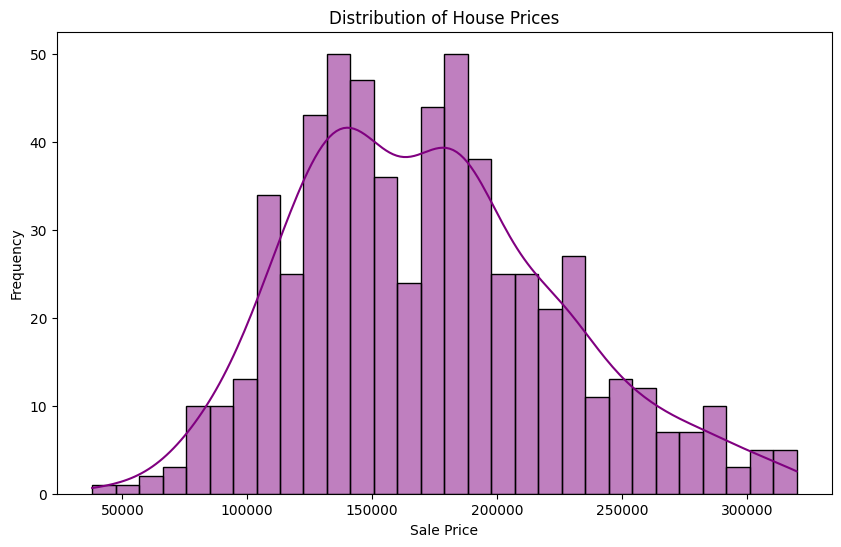

In [1261]:
# Fixing KeyError by using the correct column name 'SalePrice' instead of 'Price'
# 1. Histogram for House Prices
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=30, kde=True, color='purple')
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



In [1262]:
# Cleaning Column Names (Optional)
# To avoid future issues with spaces or casing, we can standardize column names:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


<Axes: xlabel='saleprice', ylabel='Count'>

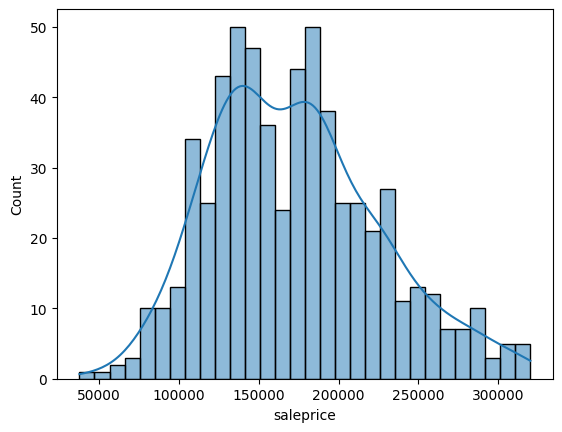

In [1263]:
# Then we use
sns.histplot(df['saleprice'], bins=30, kde=True)


In [1264]:
# Step-by-Step Fixing for keyerror:
# Check and Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)




Index(['unnamed:_0', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

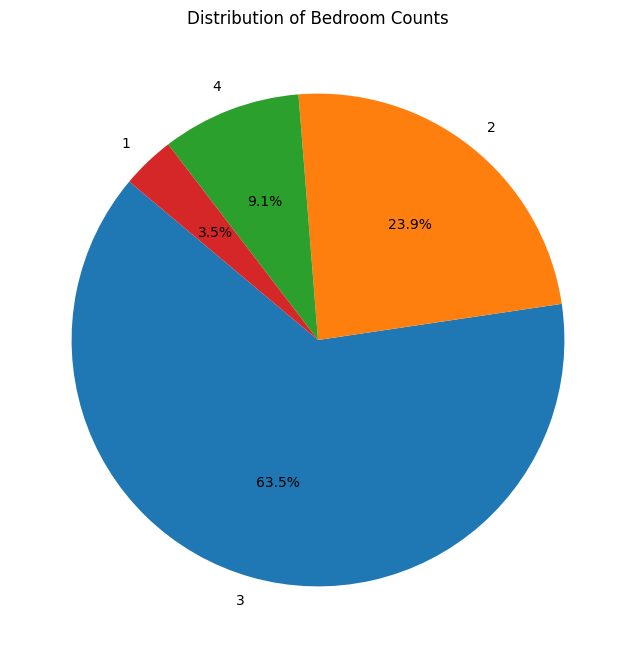

In [1265]:
# Updating Plot Code
# Pie chart of bedroom 
bedroom_counts = df['bedroomabvgr'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(bedroom_counts, labels=bedroom_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bedroom Counts')
plt.show()


In [1266]:
# Step 4: Multivariate Analysis
# Investigate relationships between multiple variables to uncover patterns and dependencies that affect house prices.
import seaborn as sns
import matplotlib.pyplot as plt


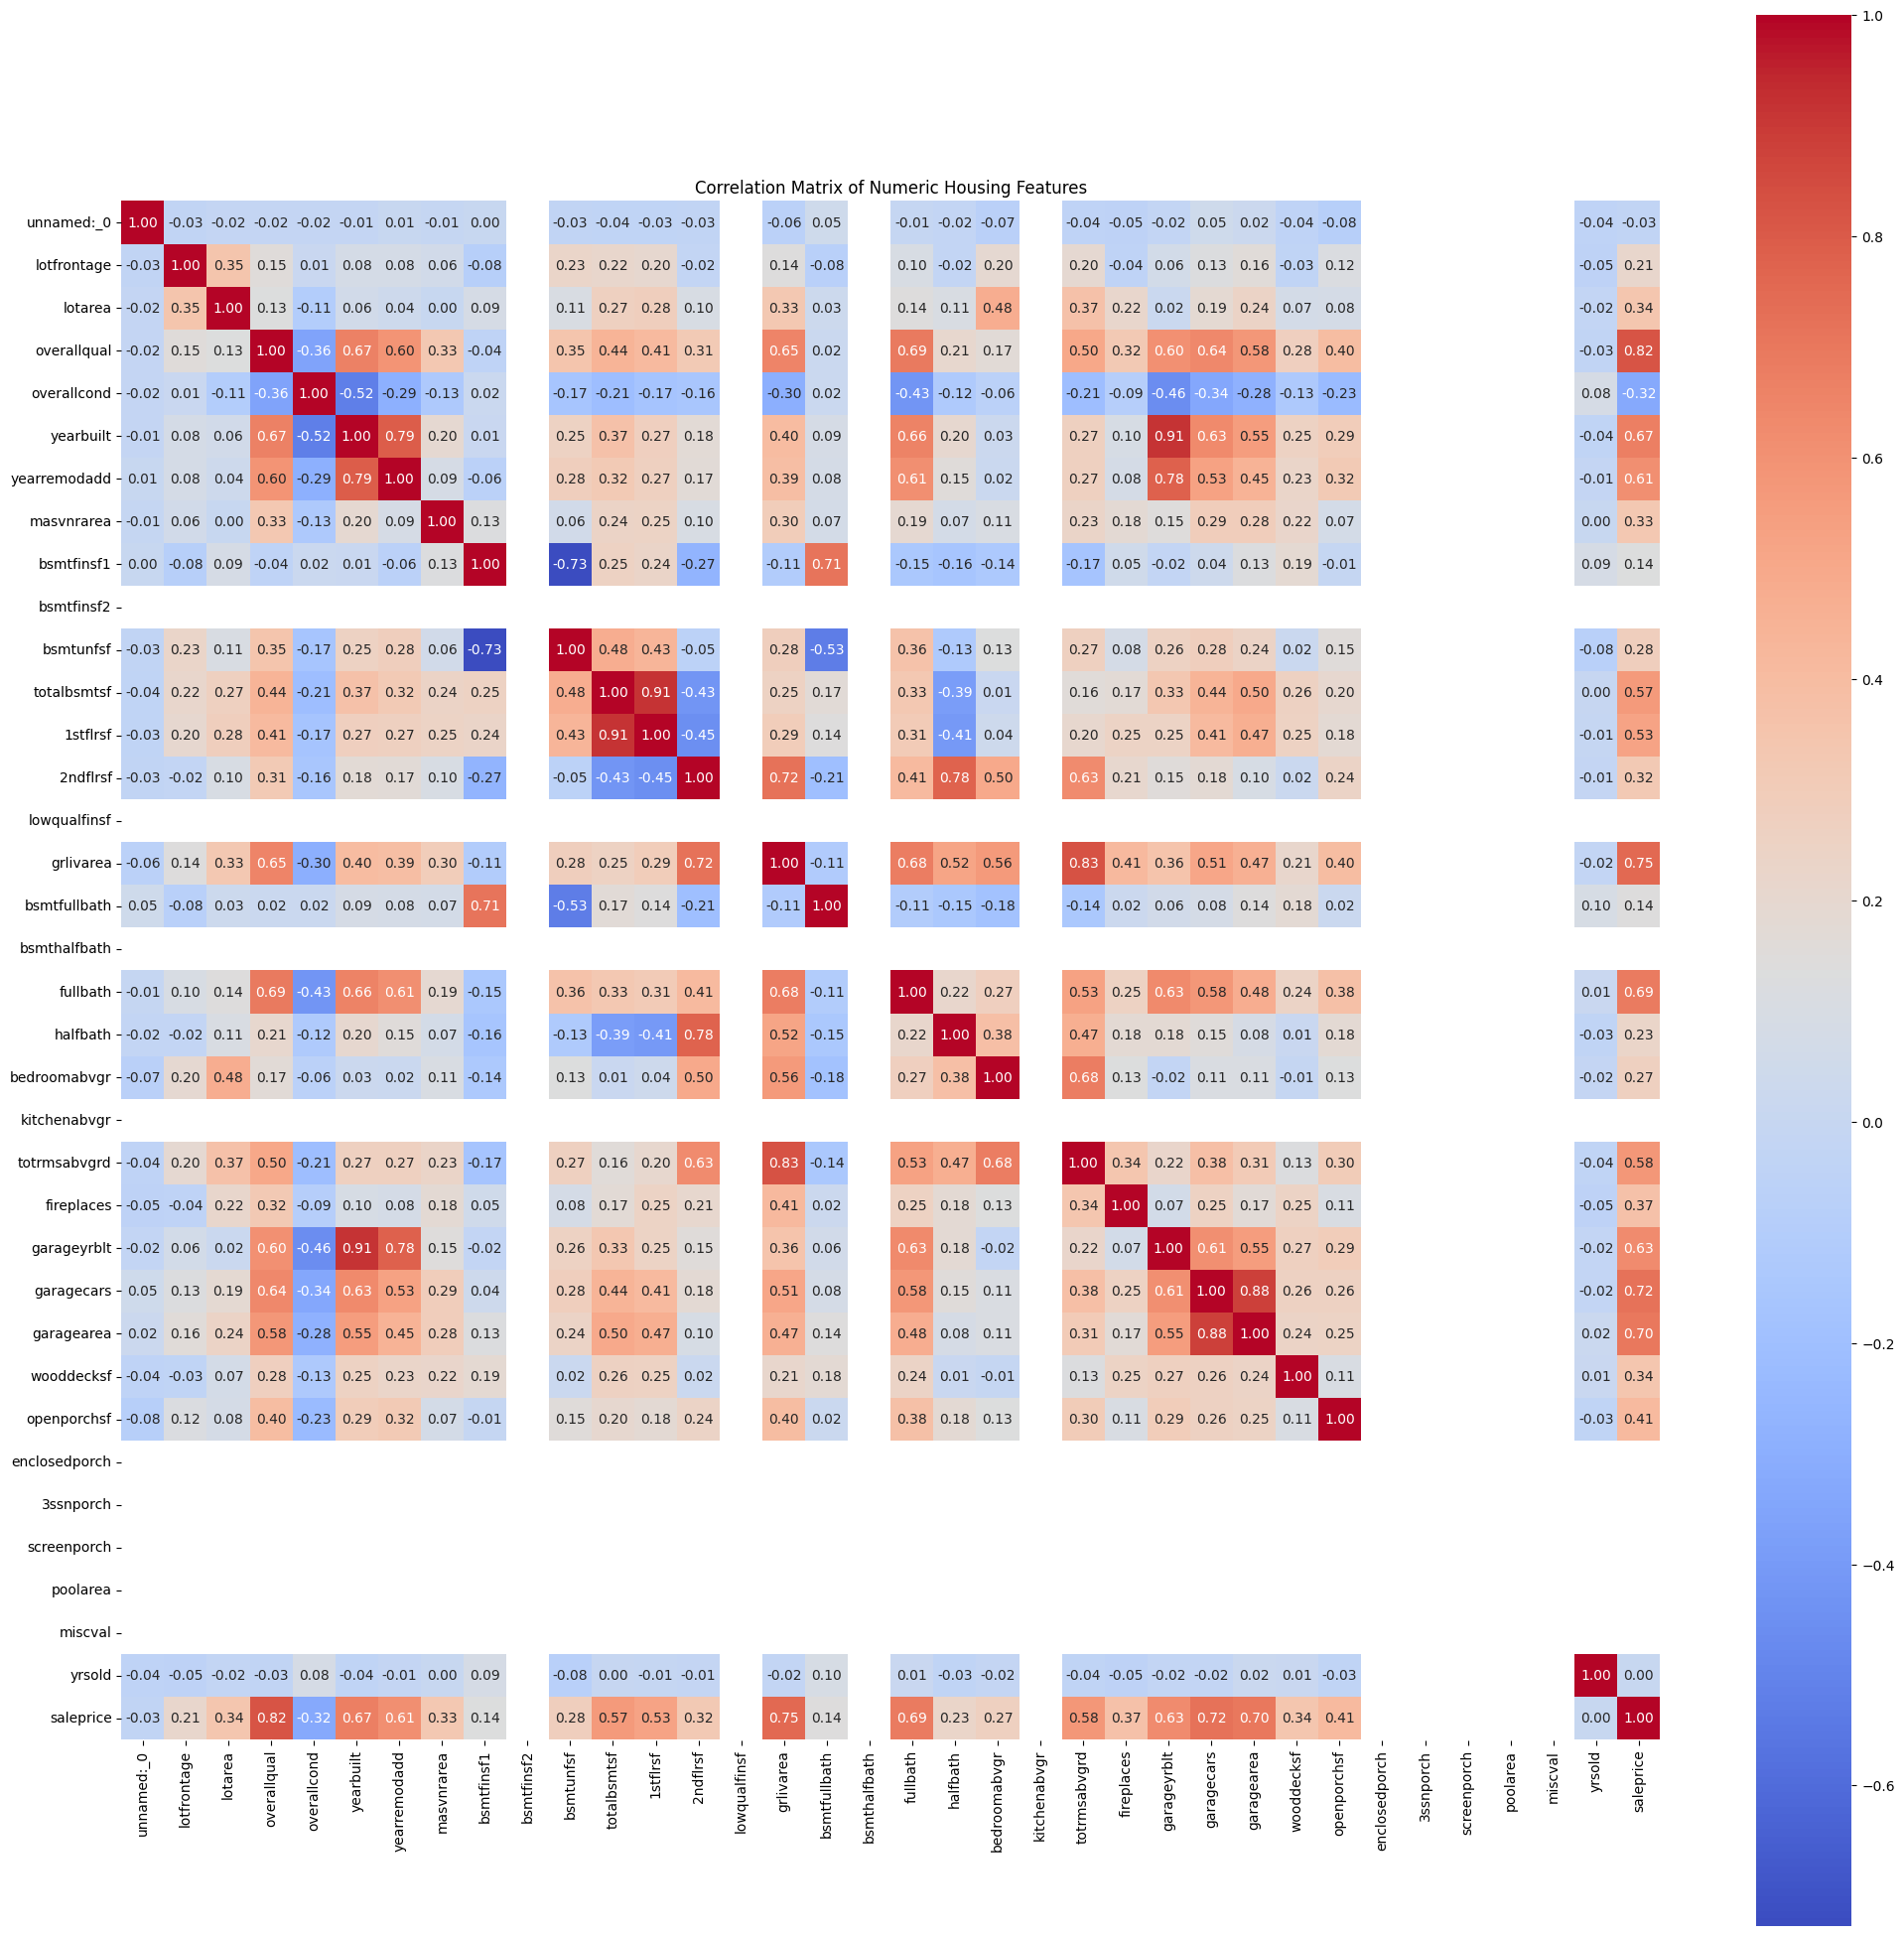

In [1267]:
# Numeric Columns for Correlation Matrix (Heatmap)
plt.figure(figsize=(25,25))

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Housing Features')
plt.show()


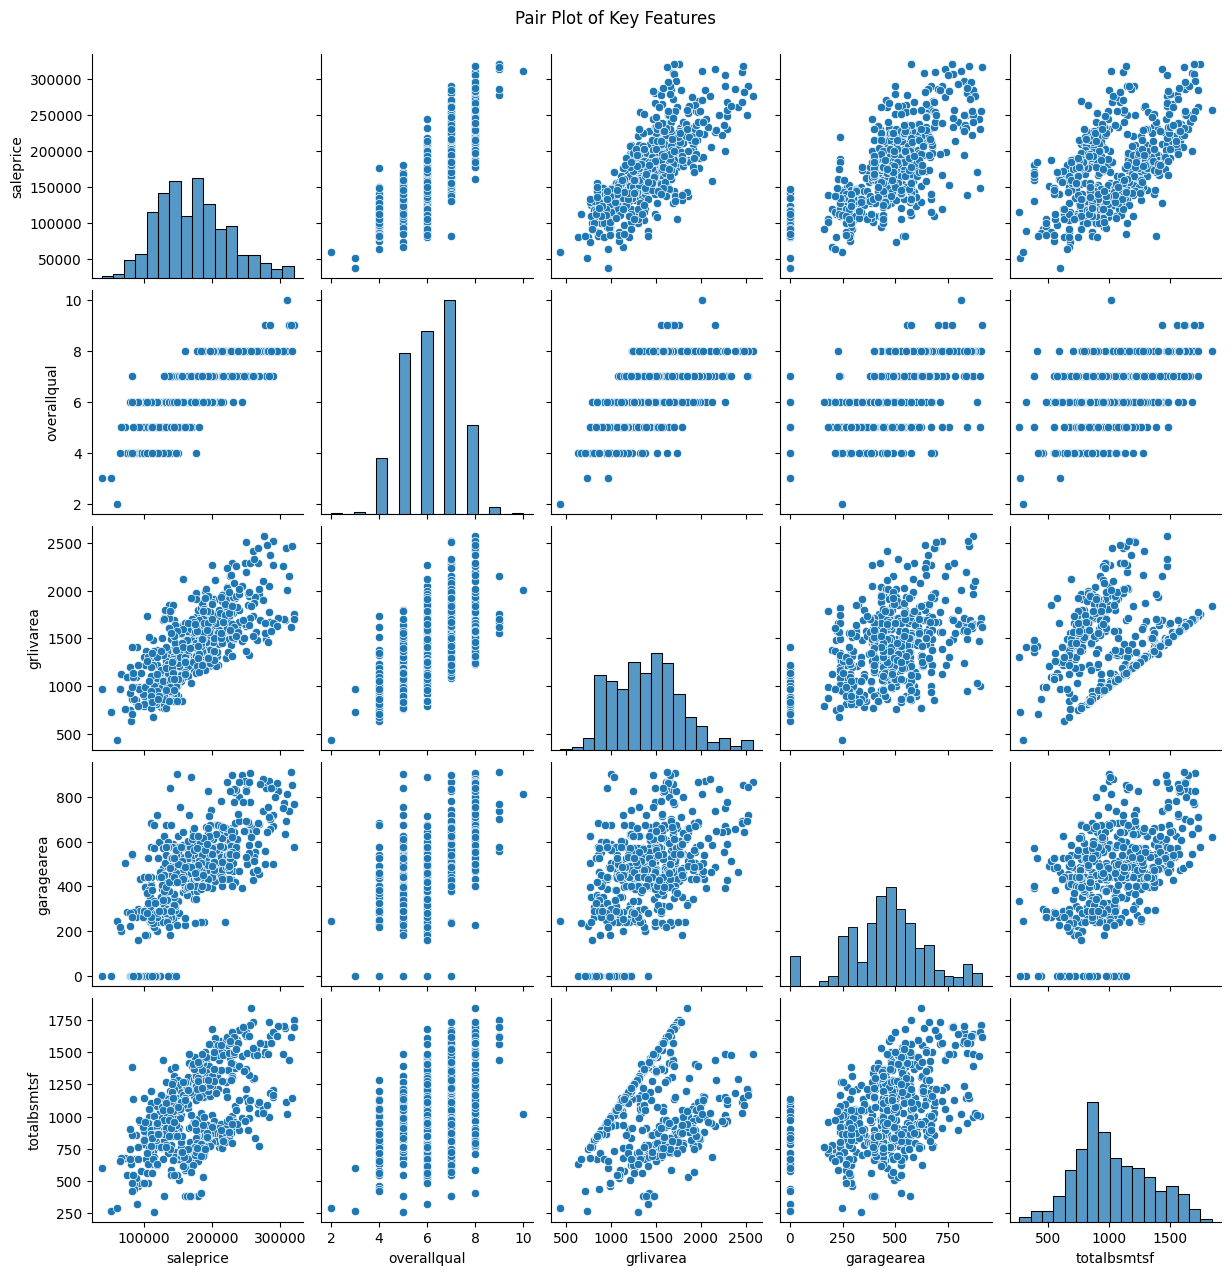

In [1268]:
# 2. Pair Plot (Scatterplot Matrix)
# This visualizes pairwise relationships between selected features.
selected_features = ['saleprice', 'overallqual', 'grlivarea', 'garagearea', 'totalbsmtsf']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


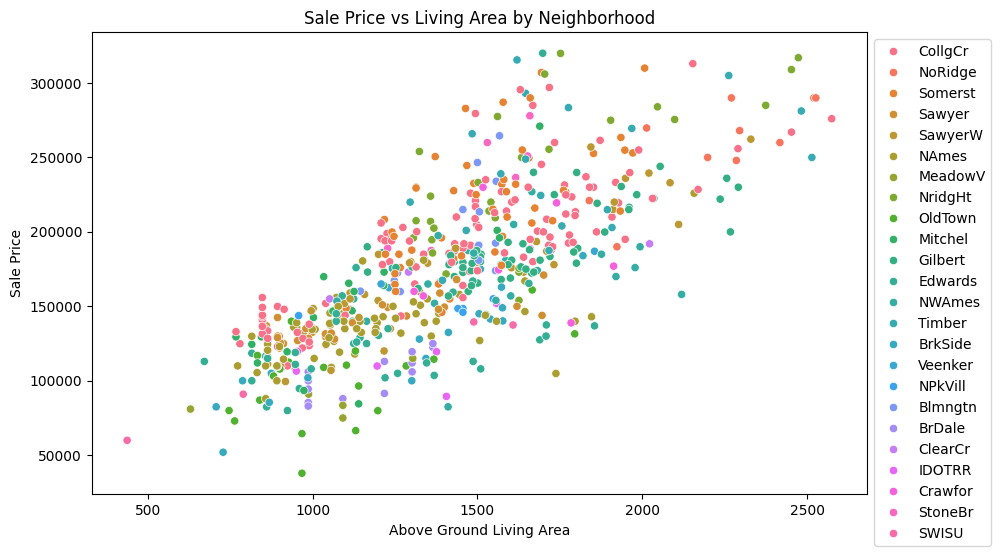

In [1269]:
# 3. Multivariate Plot with hue
# Use hue to add a third variable—like Neighborhood or HouseStyle.
plt.figure(figsize=(10,6))
sns.scatterplot(x='grlivarea', y='saleprice', hue='neighborhood', data=df)
plt.title('Sale Price vs Living Area by Neighborhood')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [1270]:
# Step 5: Feature Engineering
# Creating a new features that capture deeper insights into housing prices.

import pandas as pd


In [1271]:
# 1. Price per Square Foot
# This gives a normalized view of pricing across different house sizes.
df['price_per_sqft'] = df['saleprice'] / df['grlivarea']


In [1272]:
# 2. Property Age
# Calculate how old the house is at the time of sale.
df['property_age'] = df['yrsold'] - df['yearbuilt']


In [1273]:
# 3. Years Since Renovation
# Shows how recently the house was updated.
df['years_since_renovation'] = df['yrsold'] - df['yearremodadd']


In [1274]:
# 4. Total Bathrooms
# Combine full and half baths for a more complete feature.
df['total_bathrooms'] = df['fullbath'] + (0.5 * df['halfbath']) + df['bsmtfullbath'] + (0.5 * df['bsmthalfbath'])


In [1275]:
# 5. Total Living Area
# Include basement and above-ground space.
df['total_living_area'] = df['grlivarea'] + df['totalbsmtsf']


In [1276]:
# Step 6: Feature Engineering and Size Impact
# Explore how key features collectively affect house prices.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


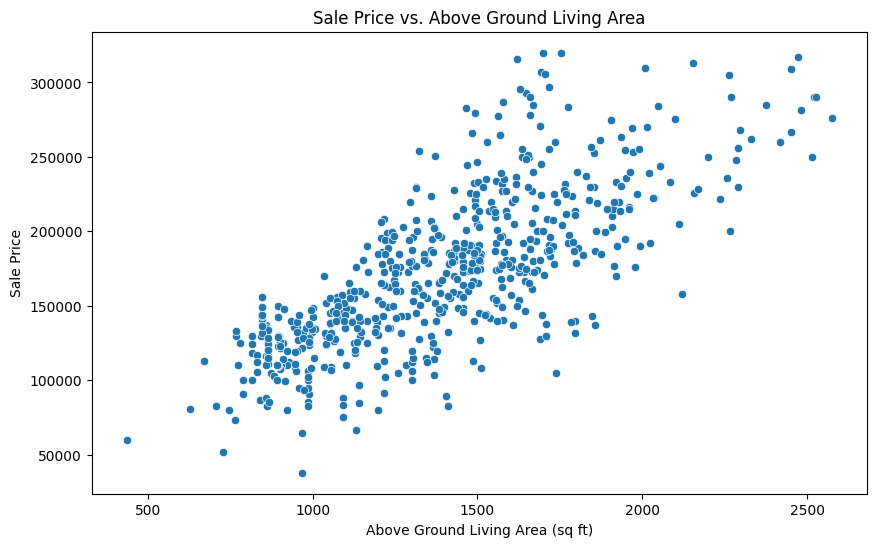

In [1277]:
# 1. Scatter Plot: Living Area vs. Sale Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='grlivarea', y='saleprice', data=df)
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


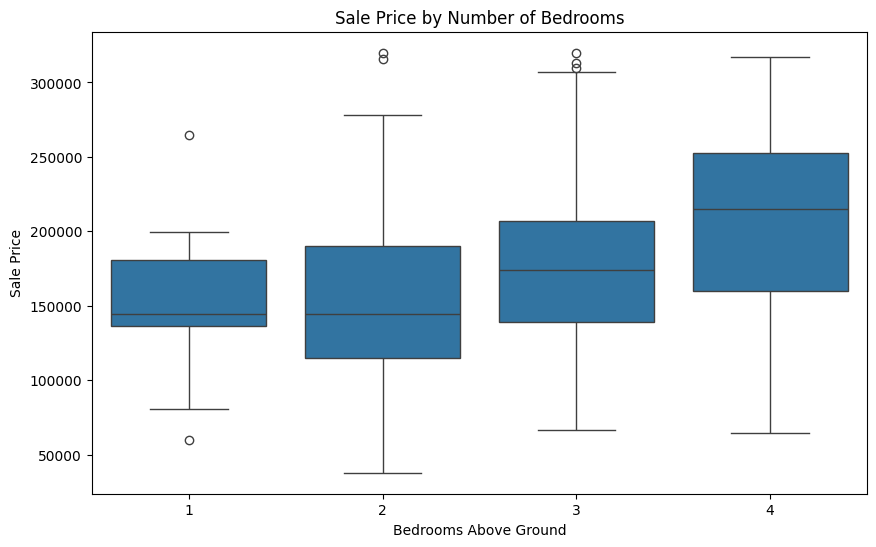

In [1278]:
# 2. Box Plot: Bedrooms vs. Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='bedroomabvgr', y='saleprice', data=df)
plt.title('Sale Price by Number of Bedrooms')
plt.xlabel('Bedrooms Above Ground')
plt.ylabel('Sale Price')
plt.show()


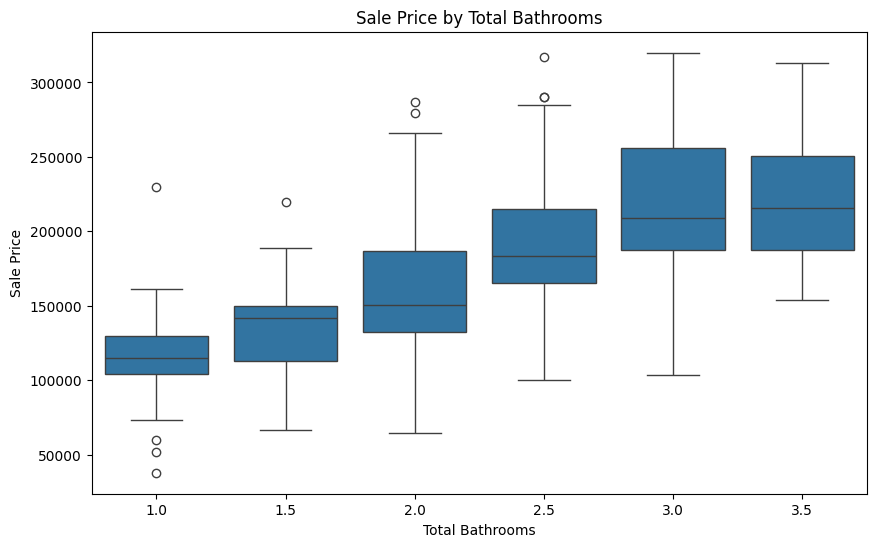

In [1279]:
# 3. Box Plot: Total Bathrooms vs. Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='total_bathrooms', y='saleprice', data=df)
plt.title('Sale Price by Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('Sale Price')
plt.show()


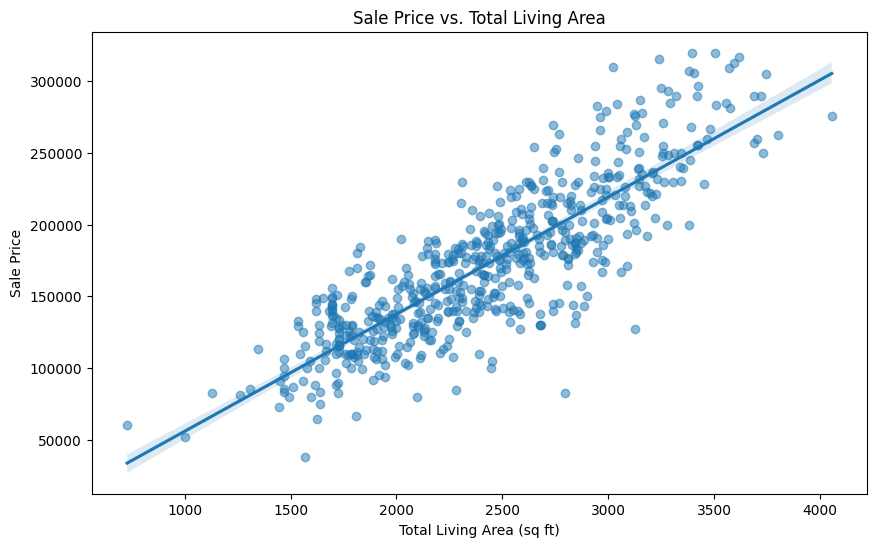

In [1280]:
# 4. Regression Plot: Total Living Area vs. Sale Price
plt.figure(figsize=(10,6))
sns.regplot(x='total_living_area', y='saleprice', data=df, scatter_kws={'alpha':0.5})
plt.title('Sale Price vs. Total Living Area')
plt.xlabel('Total Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


Markdown Insight Example
The scatter and regression plots show a strong positive relationship between living area and sale price. Box plots reveal that while more bedrooms and bathrooms generally increase value, the effect plateaus beyond 3–4 bedrooms. Total living area remains the most consistent predictor of price.

In [1281]:
# Step 7: Market Trends and Historical Pricing
# Exploring how house prices evolved across different years and identify temporal patterns.
import matplotlib.pyplot as plt
import seaborn as sns


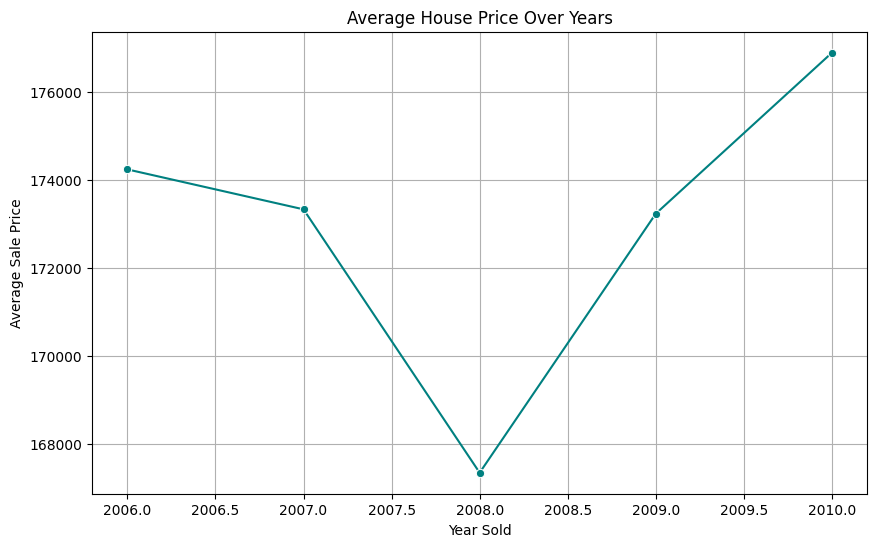

In [1282]:
# 1. Average Price by Year
# This shows how the market has shifted over time.
price_by_year = df.groupby('yrsold')['saleprice'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='yrsold', y='saleprice', data=price_by_year, marker='o', color='teal')
plt.title('Average House Price Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()


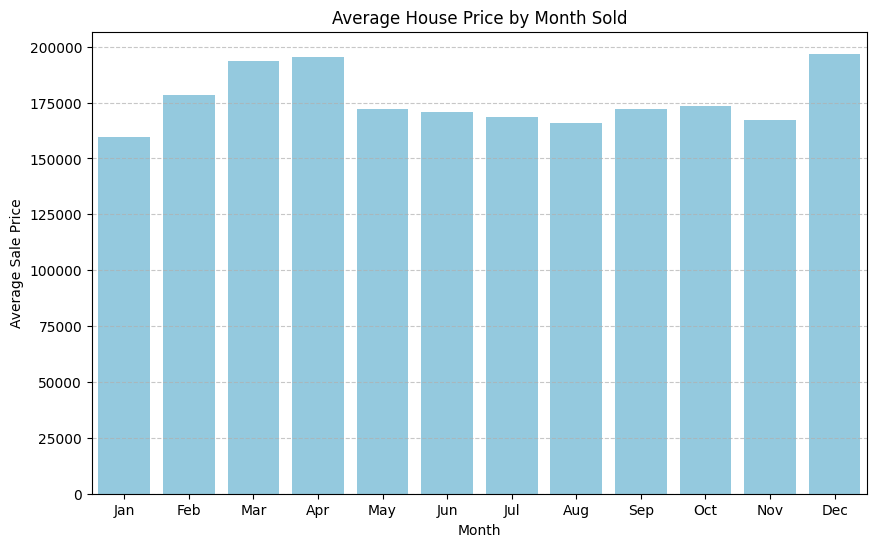

In [1283]:
# Code for Monthly Seasonality Plot
# Group by month and calculate average sale price
price_by_month = df.groupby('mosold')['saleprice'].mean().reset_index()

# Sort by month for better visual order
price_by_month = price_by_month.sort_values('mosold')

# Plot without deprecated palette usage
plt.figure(figsize=(10,6))
sns.barplot(x='mosold', y='saleprice', data=price_by_month, color='skyblue')
plt.title('Average House Price by Month Sold')
plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



3. External Market Influences (Contextual Insight)
While your dataset may not include macroeconomic indicators, you can annotate your plots with known events:

Interest rate changes

Policy reforms

Economic slowdowns or booms
Example :

Text(2008, 176884.32835820896, 'Global slowdown')

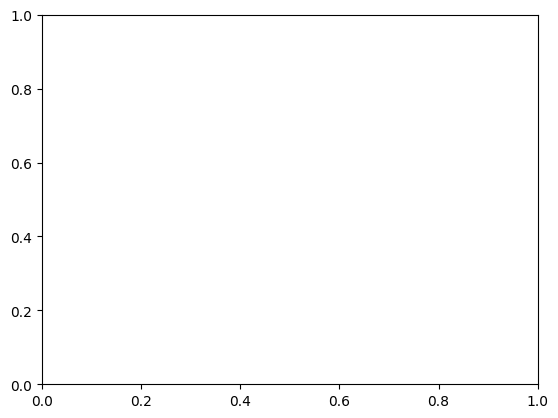

In [1284]:
# Add annotation to line plot
plt.annotate('Global slowdown', xy=(2008, price_by_year.loc[price_by_year['yrsold'] == 2008, 'saleprice'].values[0]),
             xytext=(2008, price_by_year['saleprice'].max()),
             arrowprops=dict(facecolor='red', shrink=0.05))


Markdown Insight Example
The line plot reveals a steady rise in house prices from 2006 to 2009, followed by a dip in 2010—possibly reflecting post-recession effects. Monthly trends show higher average prices in summer months, suggesting seasonal demand peaks.

In [1285]:
# Step 8: Customer Preferences and Amenities Impact
# Analyze how specific amenities and preferences influence house prices.
import matplotlib.pyplot as plt
import seaborn as sns


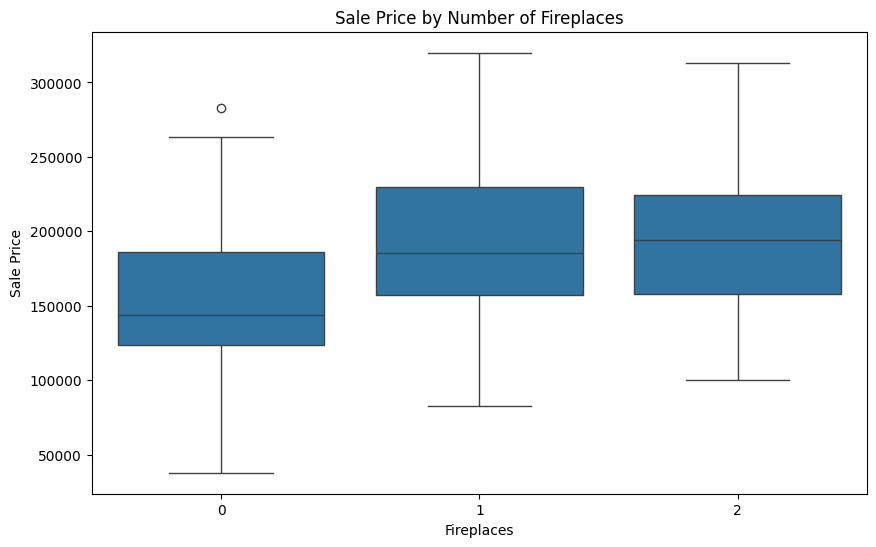

In [1286]:
# 1. Fireplaces vs. Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='fireplaces', y='saleprice', data=df)
plt.title('Sale Price by Number of Fireplaces')
plt.xlabel('Fireplaces')
plt.ylabel('Sale Price')
plt.show()


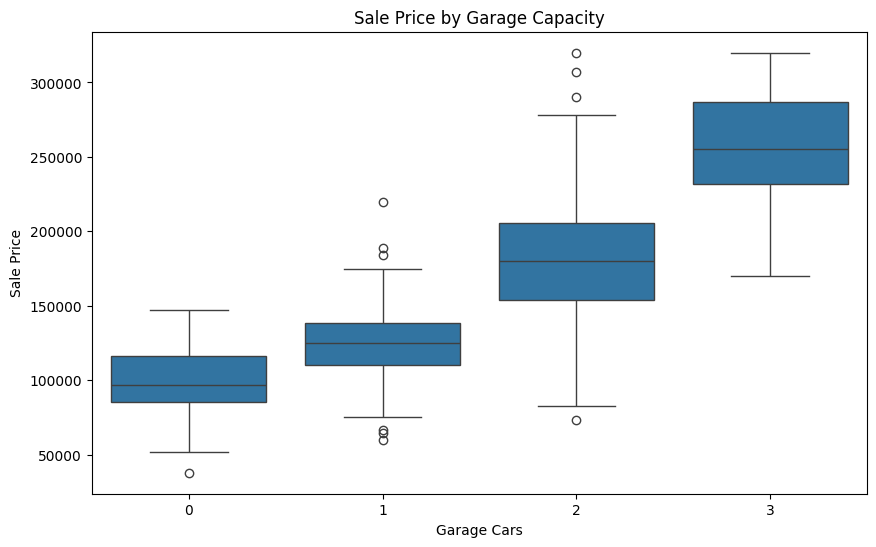

In [1287]:
# 2. Garage Capacity vs. Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='garagecars', y='saleprice', data=df)
plt.title('Sale Price by Garage Capacity')
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price')
plt.show()


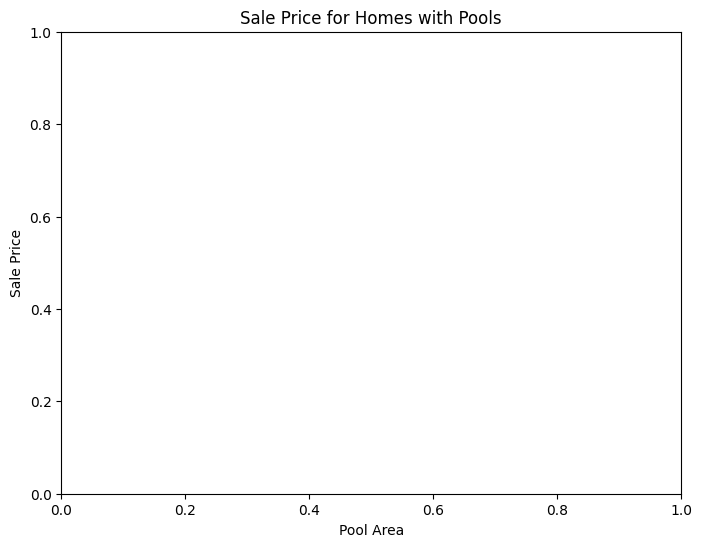

In [1288]:
# 3. Pool Presence vs. Sale Price
plt.figure(figsize=(8,6))
sns.boxplot(x='poolarea', y='saleprice', data=df[df['poolarea'] > 0])
plt.title('Sale Price for Homes with Pools')
plt.xlabel('Pool Area')
plt.ylabel('Sale Price')
plt.show()


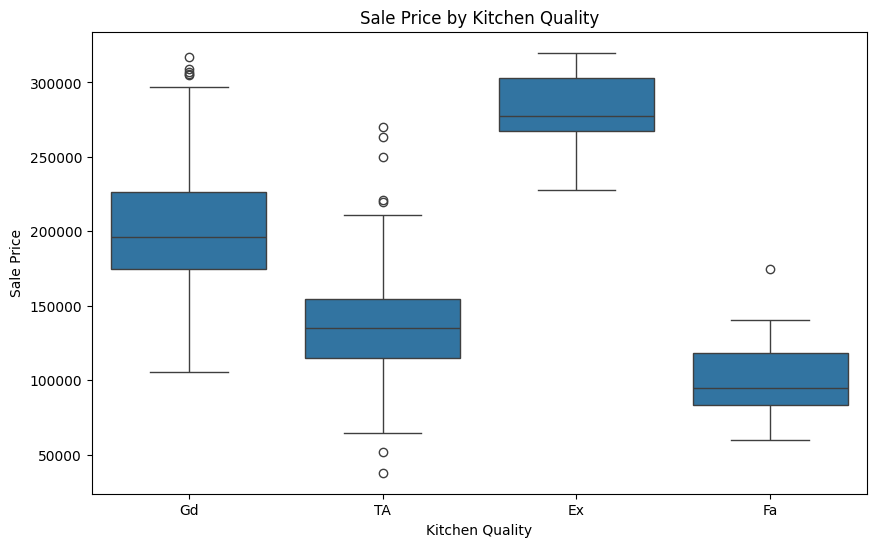

In [1289]:
# 4. Kitchen Quality vs. Sale Price
plt.figure(figsize=(10,6))
sns.boxplot(x='kitchenqual', y='saleprice', data=df)
plt.title('Sale Price by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.show()


Markdown Insight Example
Amenities like fireplaces, garages, and high-quality kitchens show a clear positive impact on house prices. While pools are rare, they command a premium when present. These features reflect customer preferences and lifestyle aspirations, making them key drivers in valuation.

In [1290]:
# Step 8: Customer Preferences and Amenities Impact
# Analyzing how specific amenities influence house prices and explore customer feedback if available.
import matplotlib.pyplot as plt
import seaborn as sns


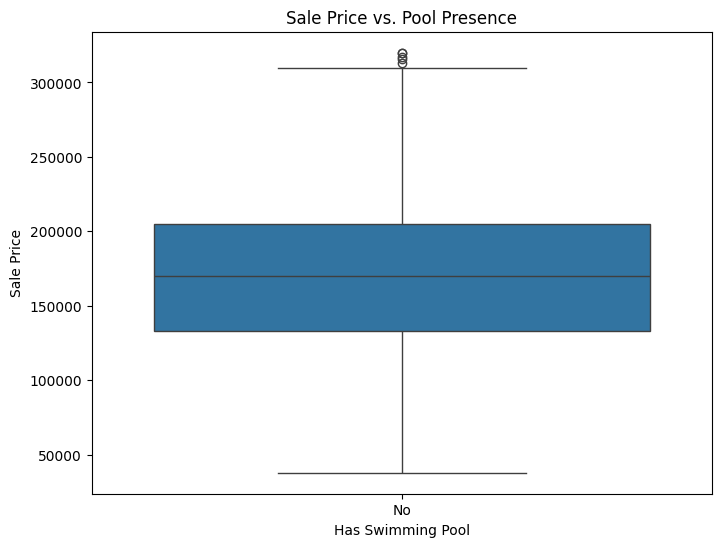

In [1291]:
# 🔍 1. Swimming Pool Impact
df['has_pool'] = df['poolarea'].apply(lambda x: 'Yes' if x > 0 else 'No')

plt.figure(figsize=(8,6))
sns.boxplot(x='has_pool', y='saleprice', data=df)
plt.title('Sale Price vs. Pool Presence')
plt.xlabel('Has Swimming Pool')
plt.ylabel('Sale Price')
plt.show()


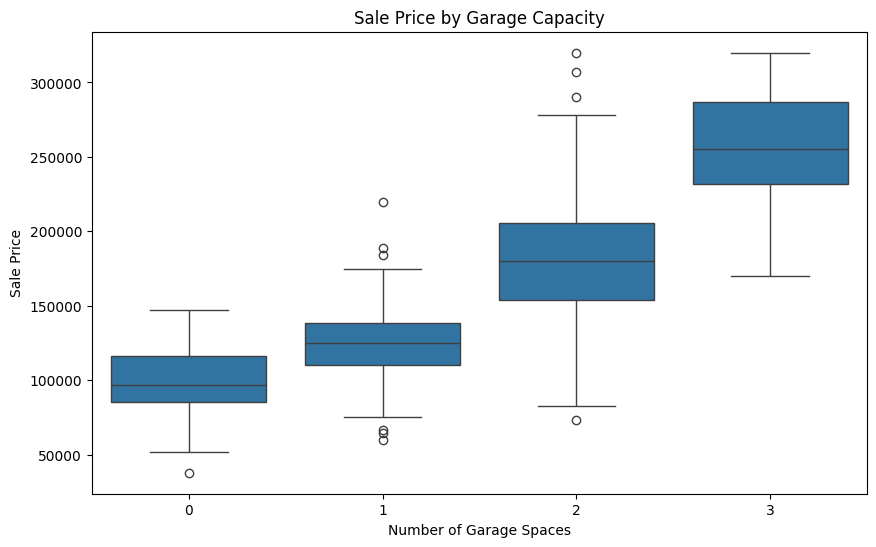

In [1292]:
# 2. Garage Capacity
plt.figure(figsize=(10,6))
sns.boxplot(x='garagecars', y='saleprice', data=df)
plt.title('Sale Price by Garage Capacity')
plt.xlabel('Number of Garage Spaces')
plt.ylabel('Sale Price')
plt.show()


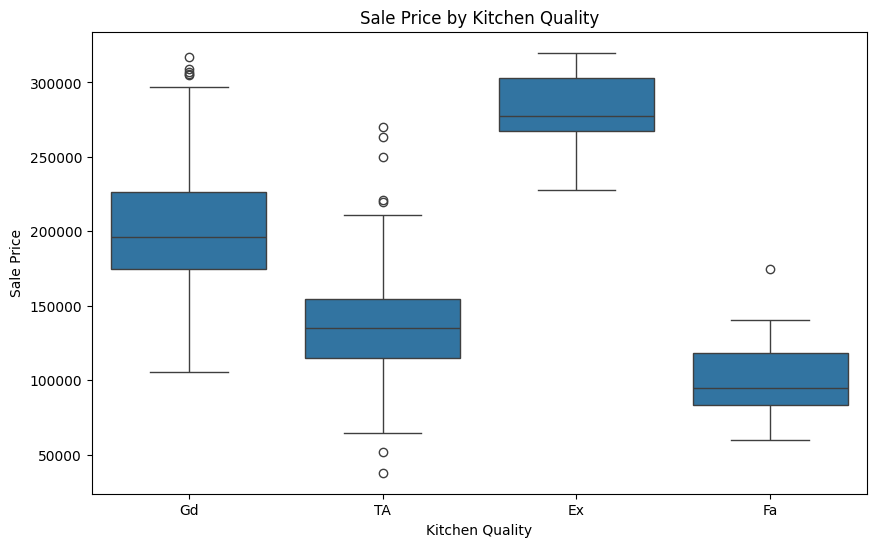

In [1293]:
# 3. Kitchen Quality
plt.figure(figsize=(10,6))
sns.boxplot(x='kitchenqual', y='saleprice', data=df)
plt.title('Sale Price by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.show()


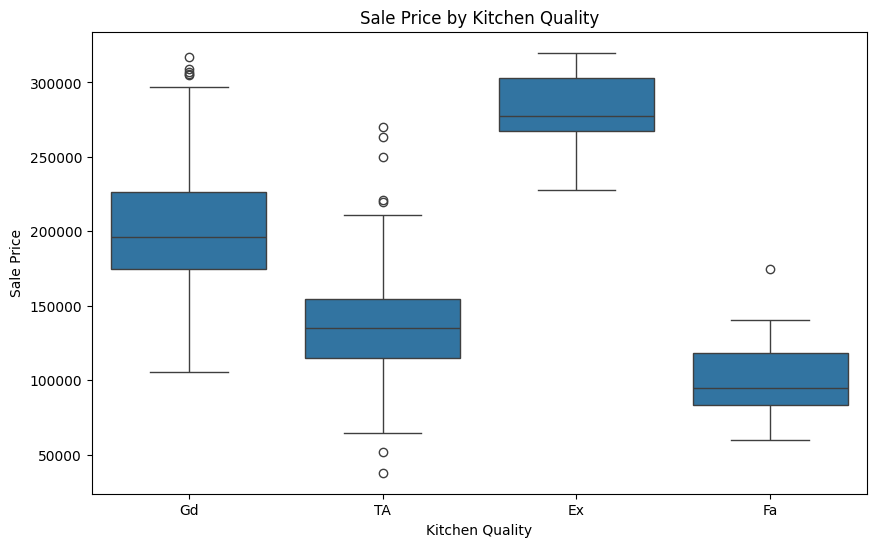

In [1294]:
# 4. Customer Feedback or Reviews
# If your dataset includes a column like customer_review, buyer_rating, or feedback_score, you can analyze sentiment:
# Here’s a corrected example using kitchenqual:
plt.figure(figsize=(10,6))
sns.boxplot(x='kitchenqual', y='saleprice', data=df)
plt.title('Sale Price by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.show()
